# Reg No-20MAI0049

Name- Vishal Manoharrao Gawali

# 16 Clustering

1. Partitioning based Methods - KMeans (Drawback: we need to provide no of clusters to form i.e, k value)
10 rounds: repeat complete process 10 times, 
iteration: 

2. Hierarchical Clustering Methods - Agglomerative Clustering

K-Means Algorithm

Step 1: It randomly selects 'k' data objects from the dataset each of which represents a cluster center
    
Step 2: (Repeat) For each of the remaining data items, an item is assigned to a Cluster to which it is most similar

                 It then computes a new mean for each cluster
                 
                 Until no change

In [5]:
#1 IMPORTING THE DATASET
import pandas as pd
customers_df = pd.read_csv("Salary_Data (1).csv")
customers_df.head(5)

,age,income
0,28,66205
1,30,57731
2,35,44555
3,37,47900
4,39,38900


C:\Users\vishal\anaconda3\lib\site-packages\seaborn\regression.py:573: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


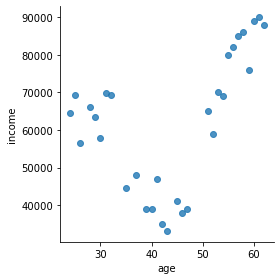

In [6]:
#2 IMPORTING THE LIBRARIES
import numpy as n
import seaborn as sn
import matplotlib as plt
%matplotlib inline

#Scatter Plot of the Data
sn.lmplot("age", "income", data = customers_df, fit_reg = False, size = 4)

In [7]:
#3 IMPORTING KMEANS
from sklearn.cluster import KMeans    #AgglomerativeClustering
clusters = KMeans(3)
clusters.fit(customers_df)

KMeans(n_clusters=3)

In [8]:
#4 THE OUTPUT VARIABLE IS clusters.labels_
customers_df["clusterid"] = clusters.labels_

In [9]:
customers_df[0:5]

,age,income,clusterid
0,28,66205,0
1,30,57731,0
2,35,44555,2
3,37,47900,2
4,39,38900,2


C:\Users\vishal\anaconda3\lib\site-packages\seaborn\regression.py:573: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


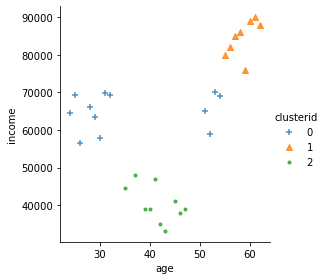

In [10]:
#5 PLOTTING THE CLUSTERS
markers = ['+', '^', '.']
sn.lmplot("age", "income", data = customers_df, hue = "clusterid", markers = markers, fit_reg = False, size =4)

In [11]:
#6 SCALING THE FEATURES
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_customers_df = scaler.fit_transform(customers_df[["age", "income"]])
scaled_customers_df[0:5]

array([[-1.33212248,  0.23763705],
       [-1.16491046, -0.23893055],
       [-0.74688039, -0.97993299],
       [-0.57966836, -0.7918142 ],
       [-0.41245633, -1.29796341]])

In [12]:
#7 CLUSTERING AGAIN
clusters_new = KMeans(3)
clusters_new.fit(scaled_customers_df)
customers_df["clusterid_new"] = clusters_new.labels_

C:\Users\vishal\anaconda3\lib\site-packages\seaborn\regression.py:573: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


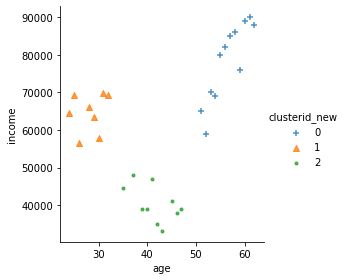

In [13]:
#8 PLOTTING AGAIN
markers = ['+', '^', '.']
sn.lmplot("age", "income", data = customers_df, hue = "clusterid_new", markers = markers, fit_reg = False, size =4)

## PROBLEM STATEMENT: Use bev.csv - Apply Clustering (KMeans and Agglomerative) - Compare the clusters created by both the techniques and comment on it

In [14]:
#1 IMPORTING THE DATASET
import pandas as pd
bev_df = pd.read_excel("bev.xlsx")
bev_df.head(5)

,Name,Potassium,Sodium,Caffeine,Cost
0,new_england_coffee,144,15,4.7,0.43
1,post_alley_blend,151,19,4.9,0.43
2,stumpdown_coffee,157,15,0.9,0.48
3,bizzy_organic_coffee,170,7,5.2,0.73
4,indian_bean,152,11,5.0,0.77


In [15]:
#2 IMPORT THE LIBRARIES (already done)
#3 SCALE THE FEATURES
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_bev_df = scaler.fit_transform(bev_df[["Potassium", "Sodium", "Caffeine", "Cost"]])
scaled_bev_df[0:5]

array([[ 0.38791334,  0.00779468,  0.43380786, -0.45682969],
       [ 0.6250656 ,  0.63136906,  0.62241997, -0.45682969],
       [ 0.82833896,  0.00779468, -3.14982226, -0.10269815],
       [ 1.26876459, -1.23935408,  0.90533814,  1.66795955],
       [ 0.65894449, -0.6157797 ,  0.71672602,  1.95126478]])

# KMeans clustering

In [21]:
#4 KMEANS CLUSTERING
clusters = KMeans(3)
clusters.fit(scaled_bev_df)
bev_df["kmeans_clusterid"] = clusters.labels_

In [22]:
#5 CLUSTERWISE DATA (data points belonging to a particular cluster)
bev_df[bev_df.kmeans_clusterid == 0]

,Name,Potassium,Sodium,Caffeine,Cost,kmeans_clusterid
0,new_england_coffee,144,15,4.7,0.43,0
1,post_alley_blend,151,19,4.9,0.43,0
5,jacobs_coffee,145,23,4.6,0.28,0
6,grounds_hounds_coffee,175,24,5.5,0.40,0
7,la_columbe_corisca,149,27,4.7,0.42,0
10,red_bay_coffee,140,18,4.6,0.44,0
16,irish_hazelnut_coffee,139,19,4.4,0.43,0
17,cremoso_coffee,144,24,4.9,0.43,0


In [23]:
bev_df[bev_df.kmeans_clusterid == 1]

,Name,Potassium,Sodium,Caffeine,Cost,kmeans_clusterid
2,stumpdown_coffee,157,15,0.9,0.48,1
8,lavazza_super_crema,99,10,4.3,0.43,1
9,mount_hagen,113,8,3.7,0.40,1
11,peerless_wholebean,102,15,4.1,0.46,1
12,stone_street_coffee,135,11,4.2,0.50,1
15,caribou_coffee,68,15,2.3,0.38,1
18,davidoff_coffee,72,6,2.9,0.46,1
19,js_coffee,97,7,4.2,0.47,1


In [24]:
bev_df[bev_df.kmeans_clusterid == 2]

,Name,Potassium,Sodium,Caffeine,Cost,kmeans_clusterid
3,bizzy_organic_coffee,170,7,5.2,0.73,2
4,indian_bean,152,11,5.0,0.77,2
13,green_mountain_coffee,150,19,4.7,0.76,2
14,koffee_cuit,149,6,5.0,0.79,2


C:\Users\vishal\anaconda3\lib\site-packages\seaborn\regression.py:573: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


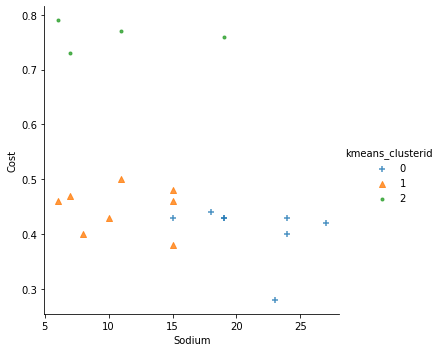

In [25]:
#6 PLOTTING THE CLUSTERS
markers = ['+', '^', '.']
sn.lmplot("Sodium", "Cost", data = bev_df, hue = "kmeans_clusterid", markers = markers, fit_reg = False, size =5)

# Agglomerative Clustering

In [26]:
from sklearn.cluster import AgglomerativeClustering
agglo_clusters = AgglomerativeClustering(3)
agglo_clusters.fit(scaled_bev_df)
bev_df["agglo_clusterid"] = clusters.labels_

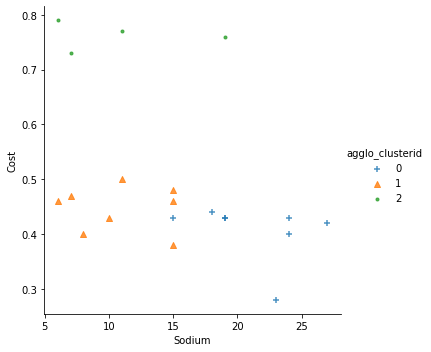

In [27]:
#6 PLOTTING THE CLUSTERS
markers = ['+', '^', '.']
sn.lmplot(x = "Sodium", y = "Cost", data = bev_df, hue = "agglo_clusterid", markers = markers, fit_reg = False, height =5)

bev_df = bev_df.drop("kmeans_clusterid", axis=1)

# Conclusion

From the plot of Kmeans and Agglomerative Clustering, there no major diffrence between them but from theory point of view K- means clustering a simply a division of the set of data  objects into non- overlapping subsets (clusters) such that each  data object is in exactly one subset)and A Agglomerative Clustering is a set of nested clusters that are arranged as a tree